<a href="https://colab.research.google.com/github/ApoorvaNagarajan/Image-Filter-Kernels/blob/master/assignment6/assignment6A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import all the required python libraries

from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras import regularizers
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [3]:
from keras.datasets import cifar10

# downloads the CIFAR10 dataset and splits it into test and train.
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()


# calculate the dimensions and number of classes
num_train, img_rows, img_cols, img_channels =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 3s 0us/step


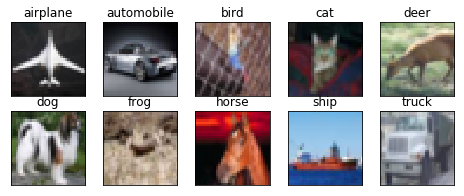

In [4]:
# gallery to display 1 image from each of the classes

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
# function to plot loss and accuracy of the network

def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
# function to calculate test accuacy

def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
#pixel normalization of test and train data
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255

# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
# Base model. The test accuracy of this model is use as base accuracy
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_77 (Conv2D)           (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_58 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_59 (Activation)   (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_55 (Dropout)         (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 15, 15, 96)        41568     
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  if sys.path[0] == '':


Epoch 1/100
390/390 [==============================] - 18s 45ms/step - loss: 1.8295 - acc: 0.3023 - val_loss: 1.4399 - val_acc: 0.4654
Epoch 2/100
390/390 [==============================] - 9s 24ms/step - loss: 1.3430 - acc: 0.5137 - val_loss: 1.1389 - val_acc: 0.5918
Epoch 3/100
390/390 [==============================] - 9s 24ms/step - loss: 1.1319 - acc: 0.6002 - val_loss: 0.9730 - val_acc: 0.6497
Epoch 4/100
390/390 [==============================] - 9s 24ms/step - loss: 1.0049 - acc: 0.6474 - val_loss: 0.9205 - val_acc: 0.6746
Epoch 5/100
390/390 [==============================] - 9s 24ms/step - loss: 0.9097 - acc: 0.6811 - val_loss: 0.8146 - val_acc: 0.7210
Epoch 6/100
390/390 [==============================] - 9s 24ms/step - loss: 0.8432 - acc: 0.7091 - val_loss: 0.8079 - val_acc: 0.7234
Epoch 7/100
390/390 [==============================] - 9s 24ms/step - loss: 0.7734 - acc: 0.7324 - val_loss: 0.7885 - val_acc: 0.7316
Epoch 8/100
390/390 [==============================] - 9s 24m

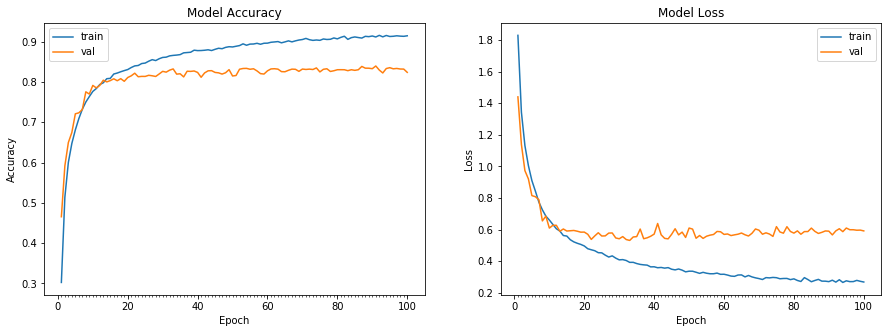

Accuracy on test data is: 82.39


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

**Observations in the new network: ( all the below observations are for 50 epochs)**
1. Removed dense layes and added 1x1 before max pooling - training accuracy imroved remarkably. But the testing accuracy remain almost the same (train acc: 0.977, train acc: 0.79)
2. Added drop out of 0.1 after every layer - training and testing accuracy gap improved, but not to the required level
(train acc: 0.95, train acc: 0.82)
3. Removed kernel regularizer and increased the droput to 0.15 at each layer : (train acc: 0.93 , test acc: 0.84 )
4. Increased number of layers : (train acc: 0.9621, 0.874)
5. Image augmentation was causing the validation accuracy of 1st epoch to 84%. In the consecutive epochs,  the validation accuracy did not improve and the accuracy was varying heavily. Hence removed image augmentation

In [15]:
# Base model accuracy is 82.39
# This is the new model in which I have corrected 

modelNew = Sequential()

modelNew.add(Convolution2D(64, 3, 3, border_mode='same', input_shape=(32,32,3))) # RF: 3x3, output dim: 32x32x48
modelNew.add(BatchNormalization())
modelNew.add(Activation('relu'))
modelNew.add(Dropout(0.15))

modelNew.add(Convolution2D(128, 3, 3, border_mode='same')) # RF: 5x5, output dim: 32x32x48
modelNew.add(BatchNormalization())
modelNew.add(Activation('relu'))
modelNew.add(Dropout(0.15))

modelNew.add(Convolution2D(256, 3, 3)) # RF: 7x7, output dim: 30x30x48
modelNew.add(BatchNormalization())
modelNew.add(Activation('relu'))
modelNew.add(Dropout(0.15))

modelNew.add(Convolution2D(64, 1, 1, activation='relu')) # RF: 7x7, output dim: 30x30x64
modelNew.add(MaxPooling2D(pool_size=(2, 2))) # RF: 14x14, output dim: 15x15x96
modelNew.add(Dropout(0.15))

modelNew.add(Convolution2D(64, 3, 3, border_mode='same')) # RF: 16x16, output dim: 15x15x64
modelNew.add(BatchNormalization())
modelNew.add(Activation('relu'))
modelNew.add(Dropout(0.15))

modelNew.add(Convolution2D(128, 3, 3, border_mode='same')) # RF: 18x18, output dim: 15x15x128
modelNew.add(BatchNormalization())
modelNew.add(Activation('relu'))
modelNew.add(Dropout(0.15))

modelNew.add(Convolution2D(256, 3, 3)) # RF: 20x20, output dim: 13x13x256
modelNew.add(BatchNormalization())
modelNew.add(Activation('relu'))
modelNew.add(Dropout(0.15))

modelNew.add(Convolution2D(64, 1, 1, activation='relu')) # RF: 20x20, output dim: 13x13x64
modelNew.add(MaxPooling2D(pool_size=(2, 2))) # RF: 40x40, output dim: 6x6x64
modelNew.add(Dropout(0.15))

modelNew.add(Convolution2D(64, 3, 3, border_mode='same')) # RF: 42x42, output dim: 6x6x64
modelNew.add(BatchNormalization())
modelNew.add(Activation('relu'))
modelNew.add(Dropout(0.15))

modelNew.add(Convolution2D(128, 3, 3, border_mode='same')) # RF: 44x44, output dim: 6x6x128
modelNew.add(BatchNormalization())
modelNew.add(Activation('relu'))
modelNew.add(Dropout(0.15))

modelNew.add(Convolution2D(256, 3, 3)) # RF: 46x46, output dim: 4x4x256
modelNew.add(BatchNormalization())
modelNew.add(Activation('relu'))


modelNew.add(Convolution2D(num_classes, 1, 1, activation='relu')) # RF: 46x46, output dim: 4x4x10
modelNew.add(Convolution2D(num_classes, 4, 4))


modelNew.add(Flatten())
modelNew.add(Activation('softmax'))


modelNew.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), padding="same")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (1, 1), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: Update your `Conv2D` call to th

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_28 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
activation_31 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_31 (Dropout)         (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 32, 32, 128)       73856     
_________________________________________________________________
batch_normalization_29 (Batc (None, 32, 32, 128)       512       
_________________________________________________________________
activation_32 (Activation)   (None, 32, 32, 128)       0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (4, 4))`


In [16]:
# Compile the model
modelNew.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


#datagen = ImageDataGenerator(featurewise_center=False,
#                             featurewise_std_normalization=False,
#                            horizontal_flip = True,
#                           rotation_range=20,
#                            width_shift_range=0.2,
#                            height_shift_range=0.2,
#                            zoom_range=0.05)

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)



# saves the model weights after each epoch if the validation loss decreased
checkpoint = ModelCheckpoint("assign6a_model",verbose=1,save_best_only=True, monitor='val_acc', mode='max')


# train the model
start = time.time()
# Train the model
model_info = modelNew.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = len(train_features), nb_epoch = 50, 
                                # validation_data = datagen.flow(test_features, test_labels),validation_steps=len(test_features)/32,
                                 validation_data = (test_features, test_labels),
                                 callbacks=[checkpoint], verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., verbose=1, steps_per_epoch=390, epochs=50)`


Epoch 1/50
390/390 [==============================] - 51s 131ms/step - loss: 1.4678 - acc: 0.4618 - val_loss: 2.0466 - val_acc: 0.3783

Epoch 00001: val_acc improved from -inf to 0.37830, saving model to assign6a_model
Epoch 2/50
390/390 [==============================] - 48s 124ms/step - loss: 0.9813 - acc: 0.6508 - val_loss: 1.1076 - val_acc: 0.6242

Epoch 00002: val_acc improved from 0.37830 to 0.62420, saving model to assign6a_model
Epoch 3/50
390/390 [==============================] - 49s 125ms/step - loss: 0.7920 - acc: 0.7206 - val_loss: 0.9215 - val_acc: 0.6906

Epoch 00003: val_acc improved from 0.62420 to 0.69060, saving model to assign6a_model
Epoch 4/50
390/390 [==============================] - 49s 125ms/step - loss: 0.6826 - acc: 0.7622 - val_loss: 0.8967 - val_acc: 0.7067

Epoch 00004: val_acc improved from 0.69060 to 0.70670, saving model to assign6a_model
Epoch 5/50
390/390 [==============================] - 49s 126ms/step - loss: 0.6129 - acc: 0.7851 - val_loss: 0.880

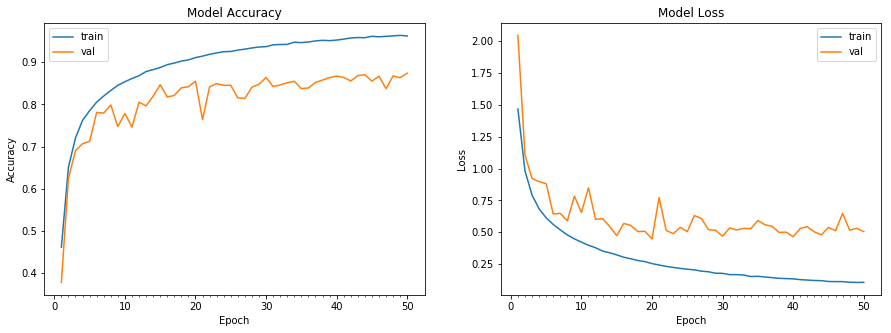

Accuracy on test data is: 87.40


In [17]:
def accuracyNew(test_x, test_y, model):
    result = modelNew.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)


# Load the saved model
modelNew.load_weights("assign6a_model");

# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracyNew(test_features, test_labels, modelNew))